In [ ]:
pip install scikit-learn

In [ ]:
!pip install tensorflow-addons==0.19.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, f1_score, auc
from sklearn.ensemble import RandomForestClassifier

import scipy
from scipy import stats

In [ ]:
train = pd.read_csv("UNSW_NB15_training-set.csv")
test = pd.read_csv("UNSW_NB15_testing-set.csv")

In [ ]:
total = pd.concat([train, test], axis=0, ignore_index=True) # ha concatenato train e test
total.drop(['id'], axis=1, inplace=True)

In [ ]:
total.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
total.dtypes

dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [ ]:
# check for missing values
missing_values = total.isnull().sum()
print(missing_values)

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [ ]:
print(train.shape)
print(test.shape)
print(total.shape)

(175341, 45)
(82332, 45)
(257673, 44)


In [ ]:
# dictionaries
state_dictionaries = {
    'no': '0',
    'FIN': '1',
    'INT': '2',
    'CON': '3',
    'ECO': '4',
    'REQ': '5',
    'RST': '6',
    'PAR': '7',
    'URN': '8',
    'ACC': '9',
    'CLO': '10'
}

service_dictionaries ={
    '-' : '0',
    'ftp' : '20',
    'smtp' : '25',
    'snmp' : '161',
    'http' : '80',
    'ftp-data' : '21',
    'dns' : '53',
    'ssh' : '22',
    'radius' : '1812',
    'pop3' : '995',
    'dhcp' : '62',
    'ssl' : '636',
    'irc' : '194'
}

protocol_dictionaries ={
                        'tcp' : '6',
                        'udp' : '11',
                        'arp' : '91',
                        'ospf' : '89',
                        'icmp' : '1',
                        'igmp' : '2',
                        'rtp' : '28',
                        'ddp' : '37',
                        'ipv6-frag' : '44',
                        'cftp' : '62',
                        'wsn' : '74',
                        'pvp' : '75',
                        'wb-expak' : '79',
                        'mtp' : '81',
                        'pri-enc' : '99',
                        'sat-mon' : '69',
                        'cphb' : '73',
                        'sun-nd' : '77',
                        'iso-ip' : '80',
                        'xtp' : '36',
                        'il' : '40',
                        'unas' : '146',
                        'mfe-nsp' : '31',
                        '3pc' : '34',
                        'ipv6-route' : '43',
                        'idrp' : '45',
                        'bna' : '49',
                        'swipe' : '53',
                        'kryptolan': '65',
                        'cpnx' : '72',
                        'rsvp': '46',
                        'wb-mon': '76',
                        'vmtp' : '81',
                        'ib' : '147',
                        'dgp' : '86',
                        'eigrp' : '88',
                        'ax.25' : '93',
                        'gmtp' :'100',
                        'pnni' :'102',
                        'sep' :'50',
                        'pgm' : '113',
                        'idpr-cmtp' : '38',
                        'zero' : '148',
                        'rvd' : '66',
                        'mobile' : '95',
                        'narp' : '54',
                        'fc' : '133',
                        'pipe' : '131',
                        'ipcomp' : '108',
                        'ipv6-no' : '59',
                        'sat-expak' : '64',
                        'ipv6-opts' : '60',
                        'snp' : '109',
                        'ipcv' : '71',
                        'br-sat-mon' : '76',
                        'ttp' : '84',
                        'tcf' : '87',
                        'nsfnet-igp' : '85',
                        'sprite-rpc' :'90',
                        'aes-sp3-d' : '96',
                        'sccopmce' : '150',
                        'sctp': '132',
                        'qnx' : '106',
                        'scps' : '105',
                        'etherip' : '97',
                        'aris' : '104',
                        'pim' : '103',
                        'compaq-peer' : '110',
                        'vrrp' : '112',
                        'iatp' : '117',
                        'stp' : '118',
                        'l2tp' : '115',
                        'srp' : '119',
                        'sm' : '122',
                        'isis' : '124',
                        'smp' : '121',
                        'fire' : '125',
                        'ptp' : '123',
                        'crtp' : '126',
                        'sps' : '130',
                        'merit-inp' : '32',
                        'idpr' : '35',
                        'skip' : '57',
                        'any' : '61',
                        'larp' : '91',
                        'ipip' :'94',
                        'micp' : '95',
                        'encap' :'98',
                        'ifmp' : '101',
                        'tp++' : '39',
                        'a/n' : '107',
                        'ipv6' : '41',
                        'i-nlsp' : '52',
                        'ipx-n-ip' : '111',
                        'sdrp' :'42',
                        'tlsp' : '56',
                        'gre' : '47',
                        'mhrp' : '48',
                        'ddx' : '116',
                        'ippc' : '67' ,
                        'visa' : '70',
                        'secure-vmtp' :'82',
                        'uti' : '120',
                        'vines' : '83',
                        'crudp' : '127',
                        'iplt' :'129',
                        'ggp' : '3',
                        'ip' : '149',
                        'ipnip' :'151',
                        'st2' : '5',
                        'argus' :'13',
                        'bbn-rcc' : '10',
                        'egp' : '8',
                        'emcon' : '14',
                        'igp' :'9',
                        'nvp' : '11',
                        'pup' : '12',
                        'xnet' :'15',
                        'chaos' : '16',
                        'mux' : '18',
                        'dcn' : '19',
                        'hmp' : '20',
                        'prm' : '21',
                        'trunk-1' : '23',
                        'xns-idp' : '22',
                        'leaf-1' : '25',
                        'leaf-2' : '26',
                        'rdp' : '27',
                        'irtp' : '28',
                        'iso-tp4' : '29',
                        'netblt' : '30',
                        'trunk-2' : '24',
                        'cbt' : '7'
       }

attack_cat_dictionaries ={
                          'Normal' : '0',
                          'Backdoor' : '1',
                          'Analysis' : '2',
                          'Fuzzers' : '3',
                          'Shellcode' : '4',
                          'Reconnaissance' : '5',
                          'Exploits' : '6',
                          'DoS' : '7',
                          'Worms' : '8',
                          'Generic' : '9'
}

In [ ]:
total['proto'] = total['proto'].map(protocol_dictionaries).astype(int)

In [ ]:
total.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,6,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,6,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,6,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,6,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,6,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
total['state'] = total['state'].map(state_dictionaries).astype(int)

In [ ]:
total['service'] = total['service'].map(service_dictionaries).astype(int)

In [ ]:
total['attack_cat'] = total['attack_cat'].map(attack_cat_dictionaries).astype(int)

In [ ]:
# Check for duplicate rows
duplicate_rows = total[total.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0] # accedo all'indice 0 dello shape, cioè n righe (shape = n righe x n colonne), colonne = indice 1
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 94928


In [ ]:
total_cleaned = total.drop_duplicates() # elimina righe duplicate

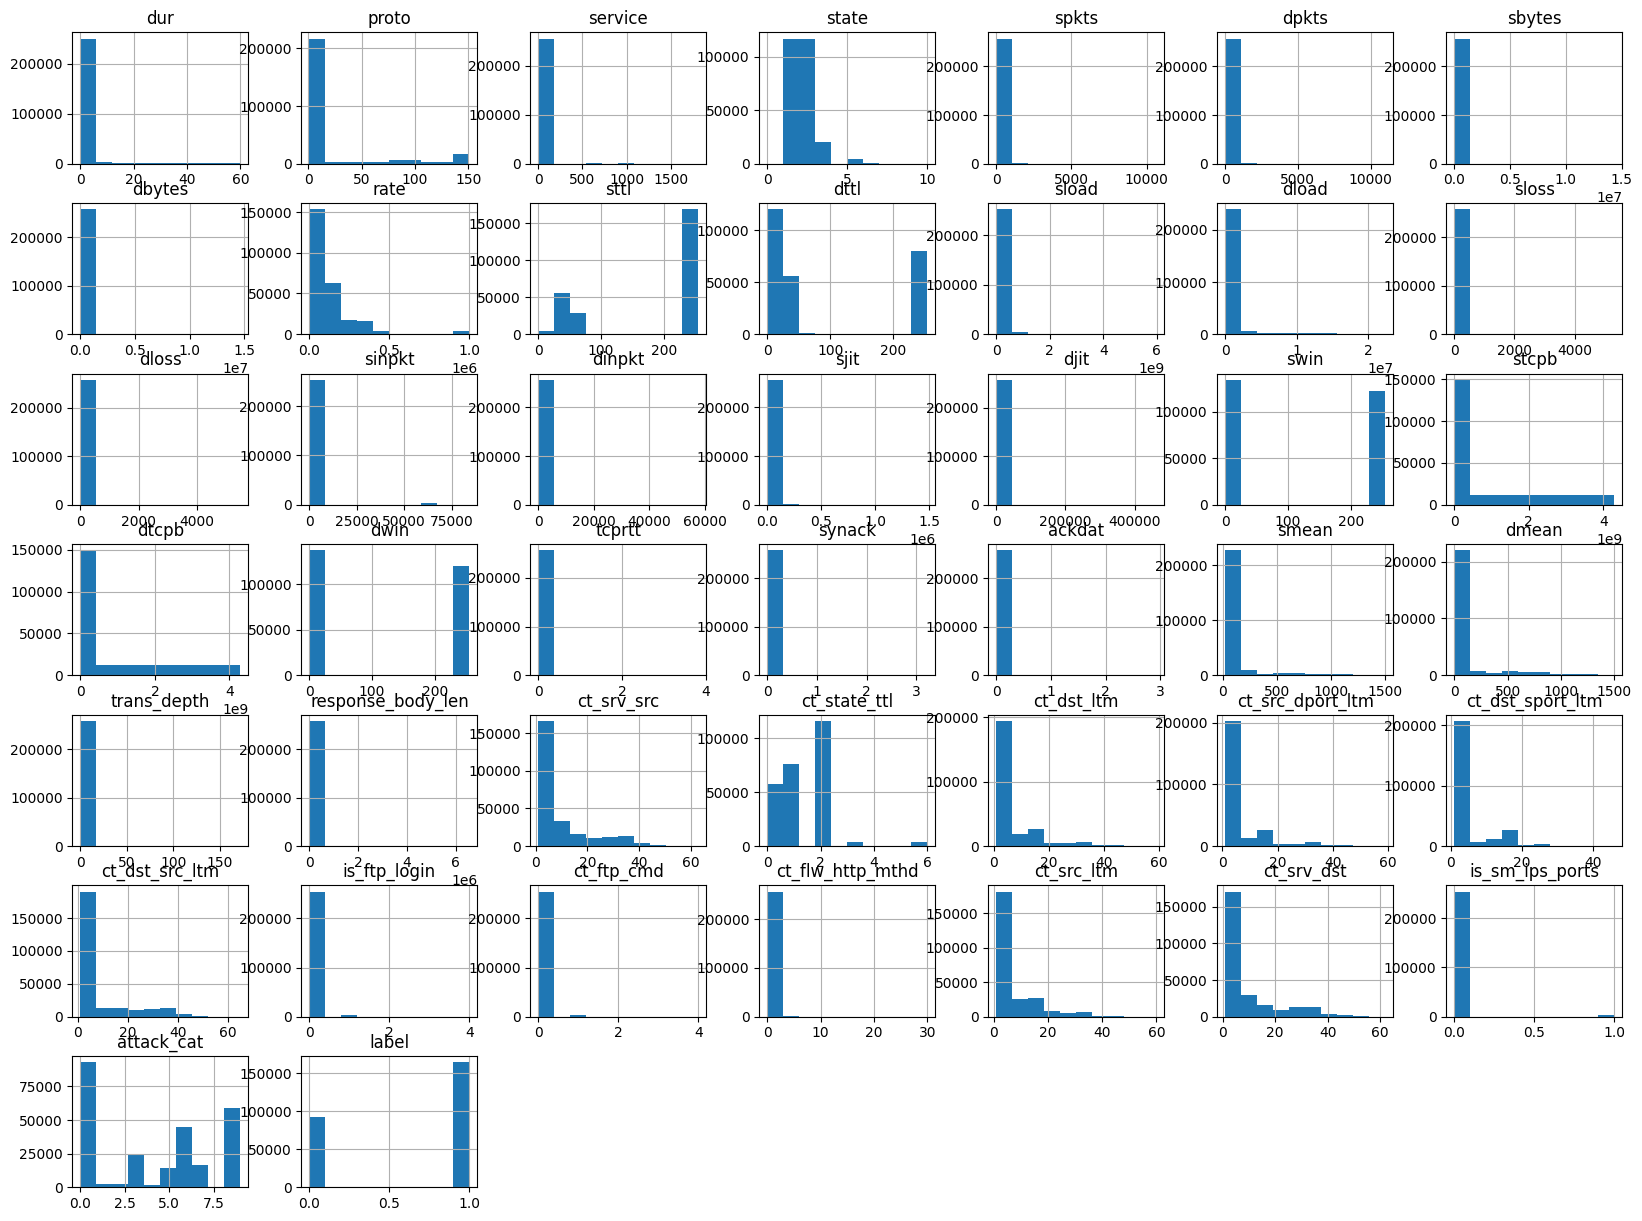

In [ ]:
# plot istogrammi features numeriche (sbilanciate)
total.hist(figsize=(20,15))
plt.show()

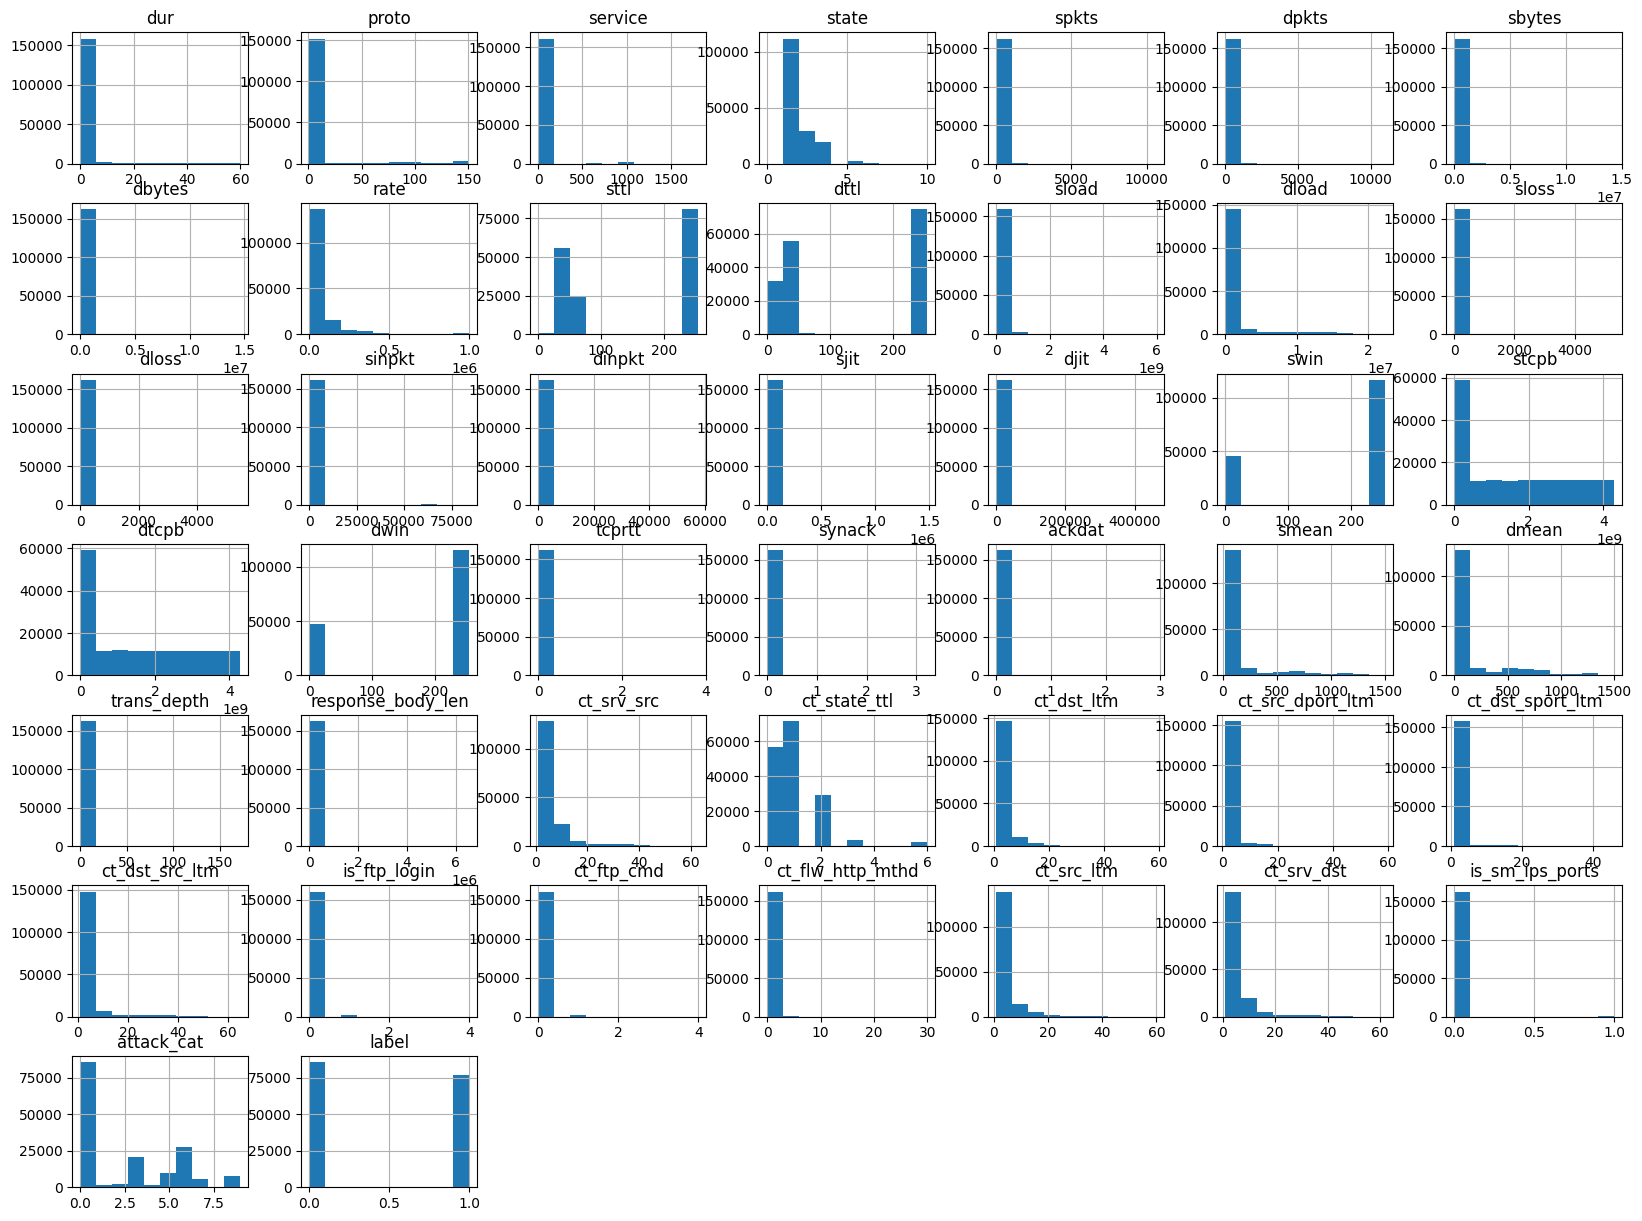

In [ ]:
# plot histogram for cleaned dataset
total_cleaned.hist(figsize=(20,15))
plt.show()

In [ ]:
total_cleaned.describe() # x estrarre info statistiche

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,1.627450e+05,1.627450e+05,1.627450e+05,162745.000000,...,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000
mean,1.252714,13.369087,30.383901,1.472506,28.609475,28.511579,1.291327e+04,2.229745e+04,3.880025e+04,146.598611,...,1.465870,3.964398,0.014698,0.014729,0.173922,3.896998,5.045476,0.003988,2.442262,0.473274
std,5.093951,25.794952,100.389509,0.809396,168.900118,137.871311,2.169121e+05,1.807485e+05,1.159475e+05,107.455744,...,2.221034,6.312773,0.122115,0.122388,0.572048,4.953769,6.451811,0.063023,2.916809,0.499287
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.001723,6.000000,0.000000,1.000000,4.000000,2.000000,5.100000e+02,1.780000e+02,2.557576e+01,31.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.328957,6.000000,0.000000,1.000000,10.000000,8.000000,9.220000e+02,3.540000e+02,8.185405e+01,62.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000
75%,0.956087,11.000000,53.000000,2.000000,20.000000,18.000000,2.456000e+03,2.478000e+03,4.002287e+03,254.000000,...,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000,6.000000,1.000000
max,59.999989,151.000000,1812.000000,10.000000,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,...,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,9.000000,1.000000


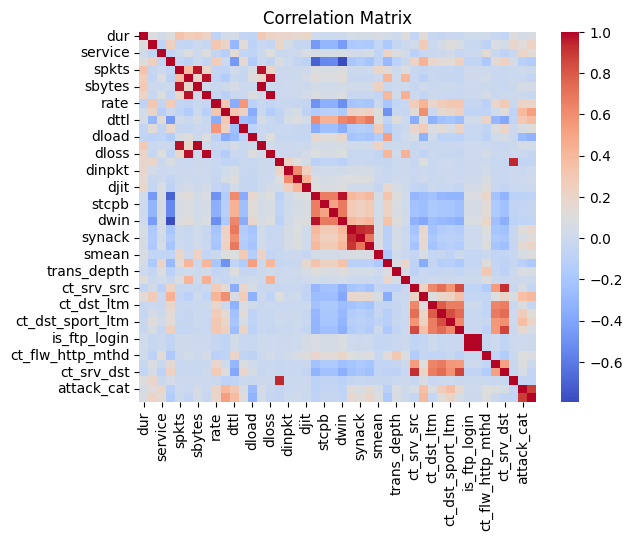

In [ ]:
correlation_matrix = total_cleaned.corr() # ogni feature è altamente correlata con se stessa

heatmap = sns.heatmap(correlation_matrix,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# separate features and target variables /label
X = total_cleaned.drop(columns = ['label']) # droppiamo le label dall'asse X
Y = total_cleaned['label'] # Y nel dataset ha solo le label

In [ ]:
# standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, Y_train)
# abbiamo addestrato il nostro modello sul set di training

SVC(kernel='linear', random_state=42)

In [ ]:
Y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred) # 1 = accurato
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(Y_test, Y_pred) # val max e min
print('Confusion Matrix:')
print(conf_matrix)
# ...
class_report = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(class_report)
# tutte le metriche danno 1 quindi 100 - overfitting?

Accuracy: 1.0
Confusion Matrix:
[[17112     0]
 [    0 15437]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17112
           1       1.00      1.00      1.00     15437

    accuracy                           1.00     32549
   macro avg       1.00      1.00      1.00     32549
weighted avg       1.00      1.00      1.00     32549



ROC AUC: 1.0


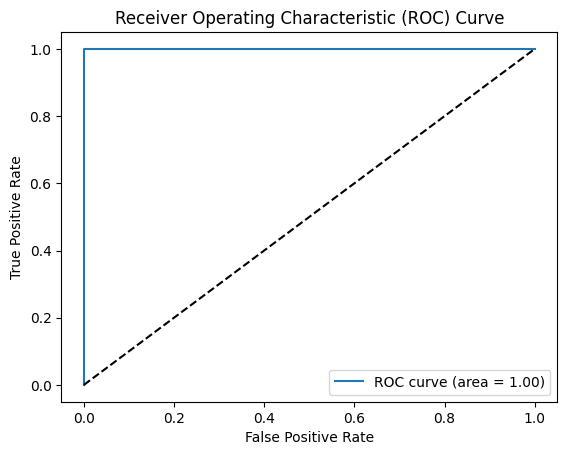

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)
svm_classifier.fit(X_train, Y_train)

# Get predicted probabilities for the positive class
Y_pred_proba = svm_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

# Calculate AUC
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# 2o modello ML, Random Forests
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)

Accuracy: 1.0
Confusion Matrix:
[[17112     0]
 [    0 15437]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17112
           1       1.00      1.00      1.00     15437

    accuracy                           1.00     32549
   macro avg       1.00      1.00      1.00     32549
weighted avg       1.00      1.00      1.00     32549



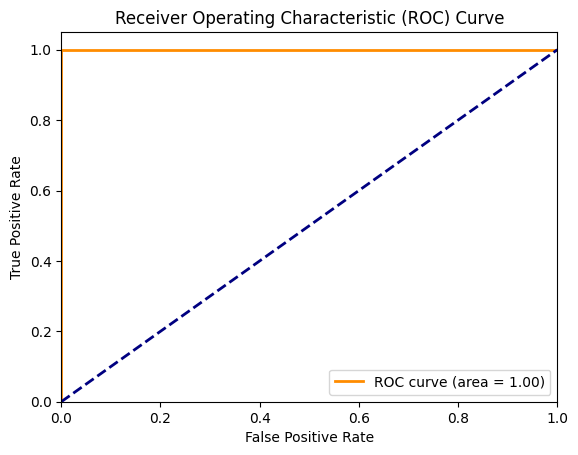

In [31]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(class_report)

# Compute ROC curve and ROC AUC
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

# Plot ROC curve (deve essere sempre massima, TP sempre al max e FP sempre al min per essere giusta)
# questa ROC curve è per le Random Forests
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Build CNN model [strati: convolutional, relu, pooling, flattening]
model = Sequential()

# Add convolutional layers con model.add
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1))) # 32 = n filtri applicati agli input in un layer /
# 64 filtri diversi che scorrono sull'input e rilevano una feature diversa
# input shape in questo caso ha una dimensione perché non è un'immagine
# relu = tutti i valori negativi vanno a 0 e gli altri 1 // f attivazione
model.add(MaxPooling1D(pool_size=(2))) # downsampling = riduce dimensionalità mappa caratteristiche
model.add(Dropout(0.25))

model.add(Conv1D(64, kernel_size=(3), activation='relu')) # convolutional layer = 1a fase estrazione features
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25)) # 25% probabilità di disattivazione dei nodi

# Add fully connected layers
model.add(Flatten()) # x convertire matrici bidimensionali risultanti dalle mappe delle caratteristiche in un unico vettore lineare lungo e continuo
model.add(Dense(128, activation='relu')) # 128 = n neuroni
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # x class. binaria (1 neurone solo)

# Print the model summary
model.summary()

# parametri che la rete impara / per il pooling, dropout, flatten etc non deve imparare parametri quindi param = 0
# ogni layer convoluzionale ha dei parametri da imparare (valori dei filtri)
# conv1d_17 avevamo dato 32 filtri mentre nel secondo 64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 41, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 9, 64)             0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 9, 64)             0

In [ ]:
# compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
# accuracy = % prev. corrette su tot. prev.
# precision = % prev. positive corrette su tot. prev. positive
# recall = % istanze positive corrette su n istanze positive
# AUC = relazione tasso FP e TP x class. binaria

In [ ]:
X_val, X_final_test, Y_val, Y_final_test = train_test_split(X_test, Y_test, test_size=0.7, random_state=42) # test diviso in val e test (70% nel test, 30% nel val)

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
4069/4069 [==============================] - 36s 8ms/step - loss: 0.2650 - accuracy: 0.8712 - precision: 0.8407 - recall: 0.8979 - auc: 0.9521 - val_loss: 0.2154 - val_accuracy: 0.8885 - val_precision: 0.8770 - val_recall: 0.8853 - val_auc: 0.9688
Epoch 2/10
4069/4069 [==============================] - 35s 9ms/step - loss: 0.2255 - accuracy: 0.8872 - precision: 0.8704 - recall: 0.8948 - auc: 0.9656 - val_loss: 0.2055 - val_accuracy: 0.8964 - val_precision: 0.8970 - val_recall: 0.8789 - val_auc: 0.9714
Epoch 3/10
4069/4069 [==============================] - 37s 9ms/step - loss: 0.2172 - accuracy: 0.8937 - precision: 0.8800 - recall: 0.8977 - auc: 0.9683 - val_loss: 0.2017 - val_accuracy: 0.8974 - val_precision: 0.9060 - val_recall: 0.8706 - val_auc: 0.9724
Epoch 4/10
4069/4069 [==============================] - 32s 8ms/step - loss: 0.2118 - accuracy: 0.8967 - precision: 0.8861 - recall: 0.8970 - auc: 0.9699 - val_loss: 0.2003 - val_accuracy: 0.9002 - val_precision: 0.8826 - v

713/713 - 2s - loss: 0.1900 - accuracy: 0.9067 - precision: 0.9076 - recall: 0.8958 - auc: 0.9756 - 2s/epoch - 3ms/step
Test loss: 0.18996477127075195
Test accuracy: 0.9067369103431702
Other metrics: [0.907609224319458, 0.8958448171615601, 0.9756428003311157]


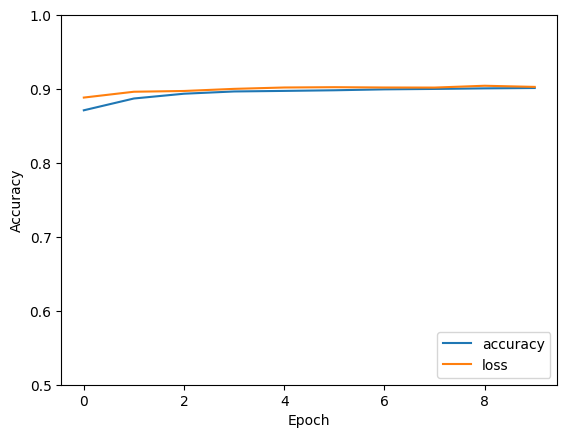

In [ ]:
# x plottare risultati
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc, *other_metrics = model.evaluate(X_final_test,  Y_final_test, verbose=2) # abbiamo testato sul test

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)
print("Other metrics:", other_metrics)

713/713 [==============================] - 2s 2ms/step


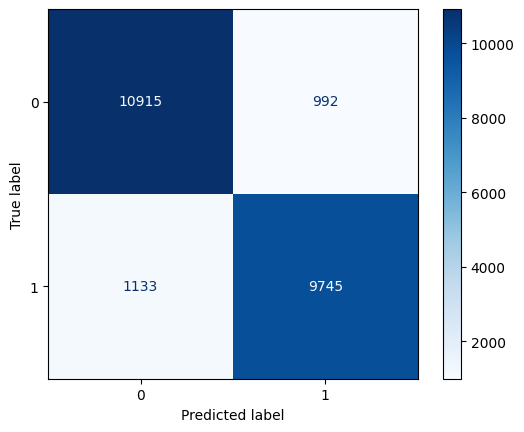

In [ ]:
# Get the predicted probabilities for the test data
cnn_probs = model.predict(X_final_test).ravel()

# Convert probabilities to binary class predictions
# Assuming a threshold of 0.5 for binary classification
cnn_pred = (cnn_probs >= 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_final_test, cnn_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# evaluate model
Y_pred_proba = model.predict(X_final_test)
Y_pred = Y_pred_proba.argmax(axis=1) # restituisce 2 probabilità e prende la massima
Y_test_true = Y_test.argmax(axis=0)

# calculate F1-score
f1 = f1_score(Y_final_test, Y_pred, average='weighted')
print('F1 Score: {f1}')

713/713 [==============================] - 2s 2ms/step
F1 Score: {f1}


713/713 [==============================] - 5s 6ms/step


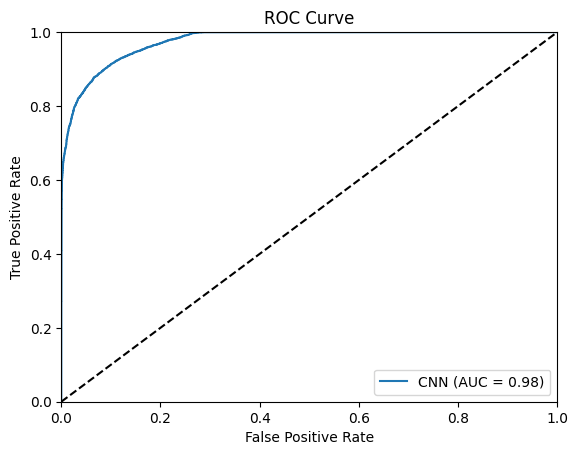

In [ ]:
# roc auc per cnn
# Get the probability scores for the positive class
cnn_probs = model.predict(X_final_test).ravel()

# Compute ROC curve and AUC for CNN
cnn_fpr, cnn_tpr, _ = roc_curve(Y_final_test, cnn_probs)
cnn_auc = auc(cnn_fpr, cnn_tpr)

# Plot ROC curve
plt.figure()
plt.plot(cnn_fpr, cnn_tpr, label='CNN (AUC = %0.2f)' % cnn_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()